# **Hand Written Digit Prediction- Classification Analysis**


The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use this image to visualize the first 4 images. The target attributes of the dataset stores the digit each image represents. 

# **Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# **Import Data**

In [4]:
from sklearn.datasets import load_digits

In [5]:
df=load_digits()

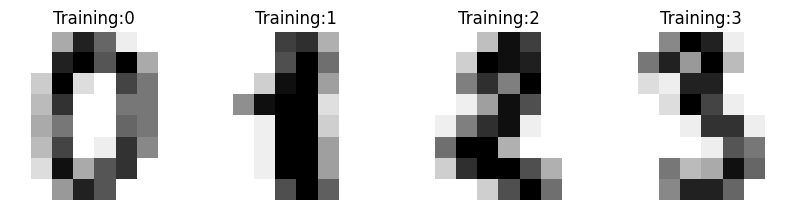

In [6]:
_,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training:%i"%label)

# **Data Processing**

In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [10]:
len(df.images)

1797

In [11]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [12]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
data[0].shape

(64,)

In [14]:
data.shape

(1797, 64)

# **Scaling Image Data**

In [16]:
data.min()

0.0

In [24]:
data.max()

0.0625

In [25]:
data=data*16

In [26]:
data.min()

0.0

In [27]:
data.max()

1.0

In [28]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train Text Split Data**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [37]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf=RandomForestClassifier()

In [40]:
rf.fit(X_train,y_train)

RandomForestClassifier()

# **Predict Test Data**

In [41]:
y_pred=rf.predict(X_test)

In [42]:
y_pred

array([1, 6, 3, 8, 0, 2, 9, 6, 0, 8, 4, 4, 2, 9, 1, 3, 2, 3, 3, 8, 7, 1,
       7, 2, 8, 2, 9, 4, 6, 2, 6, 4, 9, 8, 6, 9, 9, 1, 8, 7, 7, 1, 3, 8,
       4, 2, 6, 3, 1, 4, 4, 3, 6, 5, 8, 4, 0, 6, 2, 6, 5, 3, 0, 8, 4, 2,
       3, 1, 7, 4, 4, 6, 4, 9, 4, 5, 0, 4, 3, 5, 4, 5, 2, 0, 4, 0, 7, 2,
       0, 6, 5, 1, 8, 2, 2, 7, 6, 2, 9, 6, 1, 6, 8, 7, 5, 9, 0, 2, 8, 5,
       9, 7, 0, 9, 8, 8, 2, 3, 4, 6, 5, 5, 2, 1, 7, 2, 0, 0, 0, 2, 5, 3,
       9, 4, 2, 6, 6, 4, 6, 3, 0, 3, 6, 1, 9, 1, 1, 9, 6, 3, 3, 1, 2, 5,
       4, 8, 5, 9, 2, 6, 0, 2, 7, 4, 9, 6, 5, 8, 1, 4, 7, 0, 0, 2, 8, 4,
       7, 9, 4, 2, 2, 4, 7, 3, 6, 8, 2, 5, 5, 3, 7, 6, 4, 0, 0, 0, 3, 1,
       4, 9, 8, 8, 1, 2, 9, 4, 5, 9, 5, 3, 3, 4, 6, 6, 8, 3, 9, 4, 8, 3,
       4, 5, 1, 2, 1, 3, 3, 3, 4, 5, 1, 2, 4, 5, 2, 1, 3, 5, 8, 8, 6, 4,
       1, 6, 3, 7, 2, 0, 1, 1, 9, 2, 8, 4, 5, 3, 7, 3, 4, 1, 4, 5, 2, 4,
       7, 0, 8, 5, 5, 0, 3, 6, 4, 0, 9, 6, 4, 5, 6, 8, 9, 6, 8, 6, 5, 1,
       5, 9, 8, 0, 6, 5, 3, 1, 5, 0, 5, 0, 0, 8, 4,

# **Model Accuracy**

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
confusion_matrix(y_test,y_pred)

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 54,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 59,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  0, 65,  0,  0,  1,  3],
       [ 0,  0,  0,  0,  0,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  1,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 50,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 53]])

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       0.96      1.00      0.98        47
           2       1.00      1.00      1.00        49
           3       0.96      0.98      0.97        55
           4       1.00      0.98      0.99        60
           5       0.98      0.93      0.96        70
           6       1.00      1.00      1.00        57
           7       1.00      0.98      0.99        44
           8       0.94      0.96      0.95        52
           9       0.95      0.98      0.96        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

